In [2]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# FEATURE EXTRACTION WITHOUT DATA AUGMENTATION

In [0]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_dir = "/content/drive/My Drive/WorkingDirectory/train"
validation_dir = "/content/drive/My Drive/WorkingDirectory/validation"
test_dir = "/content/drive/My Drive/WorkingDirectory/test"

In [0]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [0]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        
        if i * batch_size >= sample_count:
            break
        return features, labels
    

In [8]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                loss='binary_crossentropy',
                metrics=['acc'])



history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels)
                   )

Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 0.6919 - acc: 0.9950 - val_loss: 0.6872 - val_acc: 0.9940
Epoch 2/30
100/100 [==============================] - 0s 5ms/step - loss: 0.6843 - acc: 0.9960 - val_loss: 0.6809 - val_acc: 0.9910
Epoch 3/30
100/100 [==============================] - 0s 5ms/step - loss: 0.6780 - acc: 0.9965 - val_loss: 0.6734 - val_acc: 0.9940
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.6694 - acc: 0.9975 - val_loss: 0.6658 - val_acc: 0.9940
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.6616 - acc: 0.9985 - val_loss: 0.6583 - val_acc: 0.9940
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.6533 - acc: 0.9990 - val_loss: 0.6501 - val_acc: 0.9960
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.6454 - acc: 0.9985 - val_loss: 0.6419 - val_acc: 0.9950
Epoch 8/30
100/100 [==============================] - 0s 5ms/step - loss: 0.

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [15]:
validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(150, 150),
                        batch_size=20,
                        class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [0]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

In [17]:
history = model.fit_generator(
                                train_generator,
                                steps_per_epoch=50,
                                epochs=30,
                                validation_data=validation_generator,
                                validation_steps=50
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
50/50 [==============================] - 1426s 29s/step - loss: 0.6432 - acc: 0.6410 - val_loss: 0.3596 - val_acc: 0.8740
Epoch 2/30
50/50 [==============================] - 728s 15s/step - loss: 0.4550 - acc: 0.7920 - val_loss: 0.4761 - val_acc: 0.7940
Epoch 3/30
50/50 [==============================] - 17s 338ms/step - loss: 0.3529 - acc: 0.8510 - val_loss: 0.1771 - val_acc: 0.9290
Epoch 4/30
50/50 [==============================] - 17s 339ms/step - loss: 0.3236 - acc: 0.8660 - val_loss: 0.1593 - val_acc: 0.9340
Epoch 5/30
50/50 [==============================] - 17s 340ms/step - loss: 0.2713 - acc: 0.8890 - val_loss: 0.2548 - val_acc: 0.9130
Epoch 6/30
50/50 [==============================] - 17s 342ms/step - loss: 0.2289 - acc: 0.9010 - val_loss: 0.1443 - val_acc: 0.9310
Epoch 7/30
50/50 [==============================] - 17s 343ms/step - loss: 0.2236 - acc: 0.9020 - val_loss: 0.1362 - val_acc: 0

In [0]:
model.save("C&DClassification.h5")

In [0]:
import matplotlib.pyplot as plt

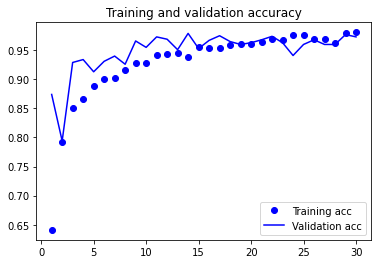

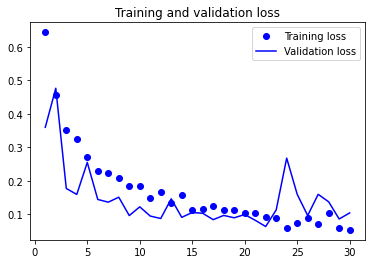

In [31]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
    return smoothed_points
  
  plt.plot(epochs,
  smooth_curve(acc), 'bo', label='Smoothed training acc')
  plt.plot(epochs,
  smooth_curve(val_acc), 'b', label='Smoothed validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs,
  smooth_curve(loss), 'bo', label='Smoothed training loss')
  plt.plot(epochs,
  smooth_curve(val_loss), 'b', label='Smoothed validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()